### Clustering Jerárquico

Algoritmo que agrupa/desagrupa las observaciones en función de su similitud (lo parecidas o diferentes que son sus variables, para lo que utilizar una métrica de distancia) de manera iterativa, formando un árbol.

Existen dos métodos extendidos:

* Bottom-up o aglomerativo: inicialmente, cada observación fomra un nodo (hojas, y en cada iteración se agrupacon los dos nodos más similares, hasta que todas las observaciones están en el midmo nodo (raiz).
* Top-down o divisivo: inicialmente, todas las observaciones están en el mismo nodo (raiz) y en cada iteración se descompone el nodo que tiene los dos subgrupos más diferentes entre sí, hasta que hay sólo una observación por nodo (hojas).

Se representa mediante un dendograma, y con cortes horizontales se obtienen distintos clusters.

Se pueden asginar nuevas observaciones al cluster más cercando (se podrían recalcualr los clusters, o no)

Resticciones:

* Sólo puede utilizar variables numéricas
* Snesible a outliers (ayuda a detectarlos)
* Utiliza una matriz de distancias, por lo que no es adecuado para grandes datasets

Parámetros:

* method: método para medir la distancia entre grupos ; single (mínima distancia entre pares de puntos de los dos grupos), complete (máxima distancia), average (distancia media)...
* metric: métrica para medir la distnaica entre observaciones; euclidean, minkowski, mahalanobis...


#### Importar paquetes

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage #algoritmo para generar e ilustrar clustering jerárquico
import numpy as np
np.set_printoptions(precision=5,suppress=True) #eliminamos notación científica (visualización)

from scipy.cluster.hierarchy import fcluster # Para asignar los puntos a los clusters elegidos

#### Simulación de los datos

In [25]:
# Simulamos los datos: 500 observaciones, 2 variables, 7 clusters 

data = make_blobs(n_samples=500,n_features=2,centers=7,cluster_std=1.4,random_state=123456789)
data

(array([[  5.62716,  -9.47267],
        [ -5.23078,   2.44612],
        [ -3.90461,   5.2063 ],
        [  6.5776 ,  -8.96156],
        [  4.69828,   2.8153 ],
        [  1.50494,   6.13915],
        [  5.2588 ,   0.97516],
        [ -0.67375,   6.0495 ],
        [  5.67782,   7.37373],
        [ -2.21494,   0.85358],
        [  5.26091,  -8.46192],
        [  5.79539,  -8.58397],
        [ -4.67066,   5.49216],
        [ -5.05505,   1.35818],
        [  2.55452,   1.07862],
        [ -3.99842,   6.12447],
        [  5.31367,   3.51318],
        [  3.81782,   3.86359],
        [  7.51848,  -6.94125],
        [  6.21532, -10.08429],
        [  3.29753,   4.08217],
        [  0.25515,   1.14291],
        [  5.60828,  -9.46388],
        [  8.8289 ,  -7.18347],
        [  8.28318,  -5.03743],
        [ 10.06015,  -8.64636],
        [  1.10147,   0.27249],
        [  0.57891,   2.17015],
        [  1.89019,   2.41149],
        [ 10.90357,  -9.78956],
        [ -0.94534,   3.42399],
        

In [27]:
datos_simulados = data[0]
cluster_simulado= data[1]

#### Visualización de los datos

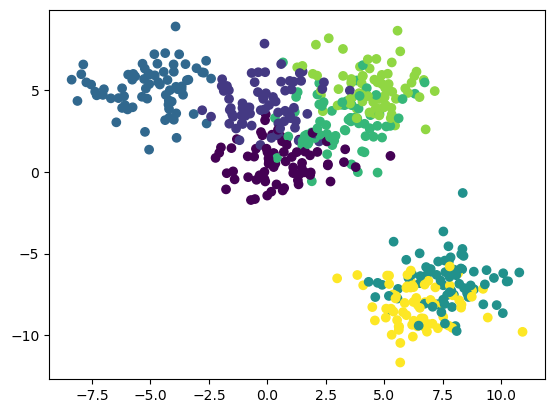

In [34]:
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=cluster_simulado)

En este caso se ve que la separación entre las observaciones no es tan clara.

#### Construcción de los clusters

Se obtiene la división jerárquica (se trata de un algoritmo aglomerativo):

In [39]:
jerarquia = linkage(y = datos_simulados, method="average",metric="euclidean")

Se dibuja el dendograma:

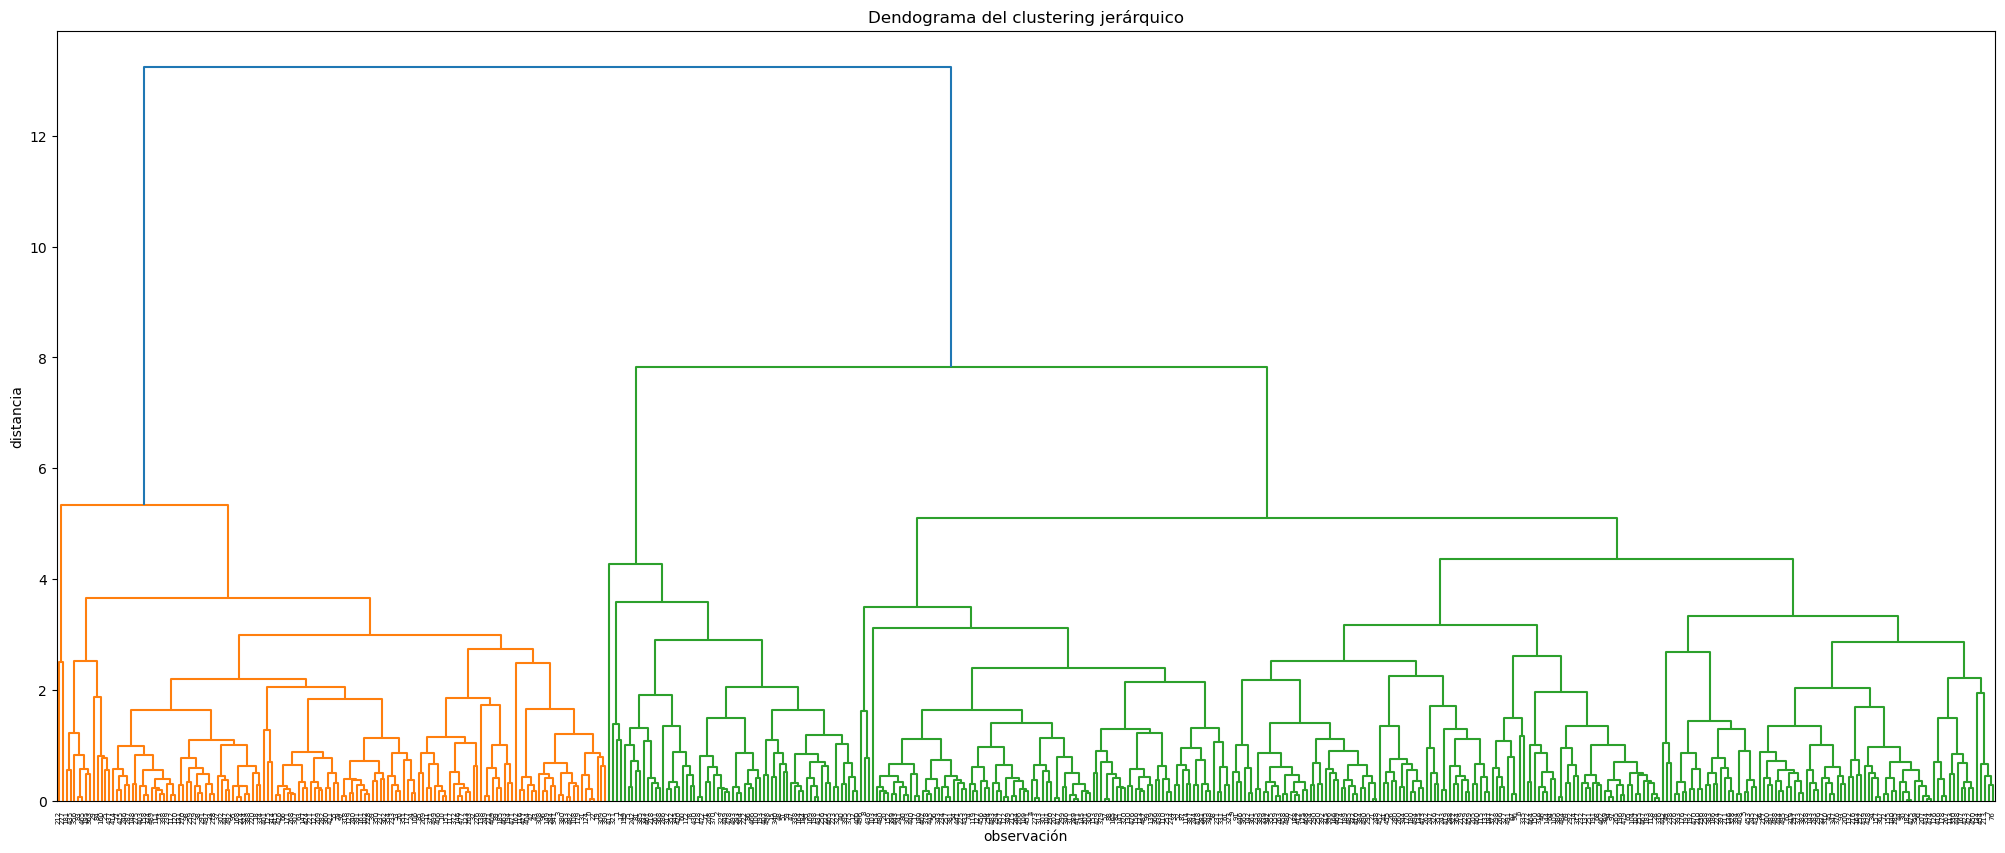

In [46]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico")
plt.xlabel("observación")
plt.ylabel("distancia")
dendrogram(jerarquia)
plt.show()

La función dendogram también permite colapsar las ramas a partir de cierta profundidad e indicar el número de hojas colapsadas, para hacernos una idea de la volumetría de los grupos y de posibles outliers.

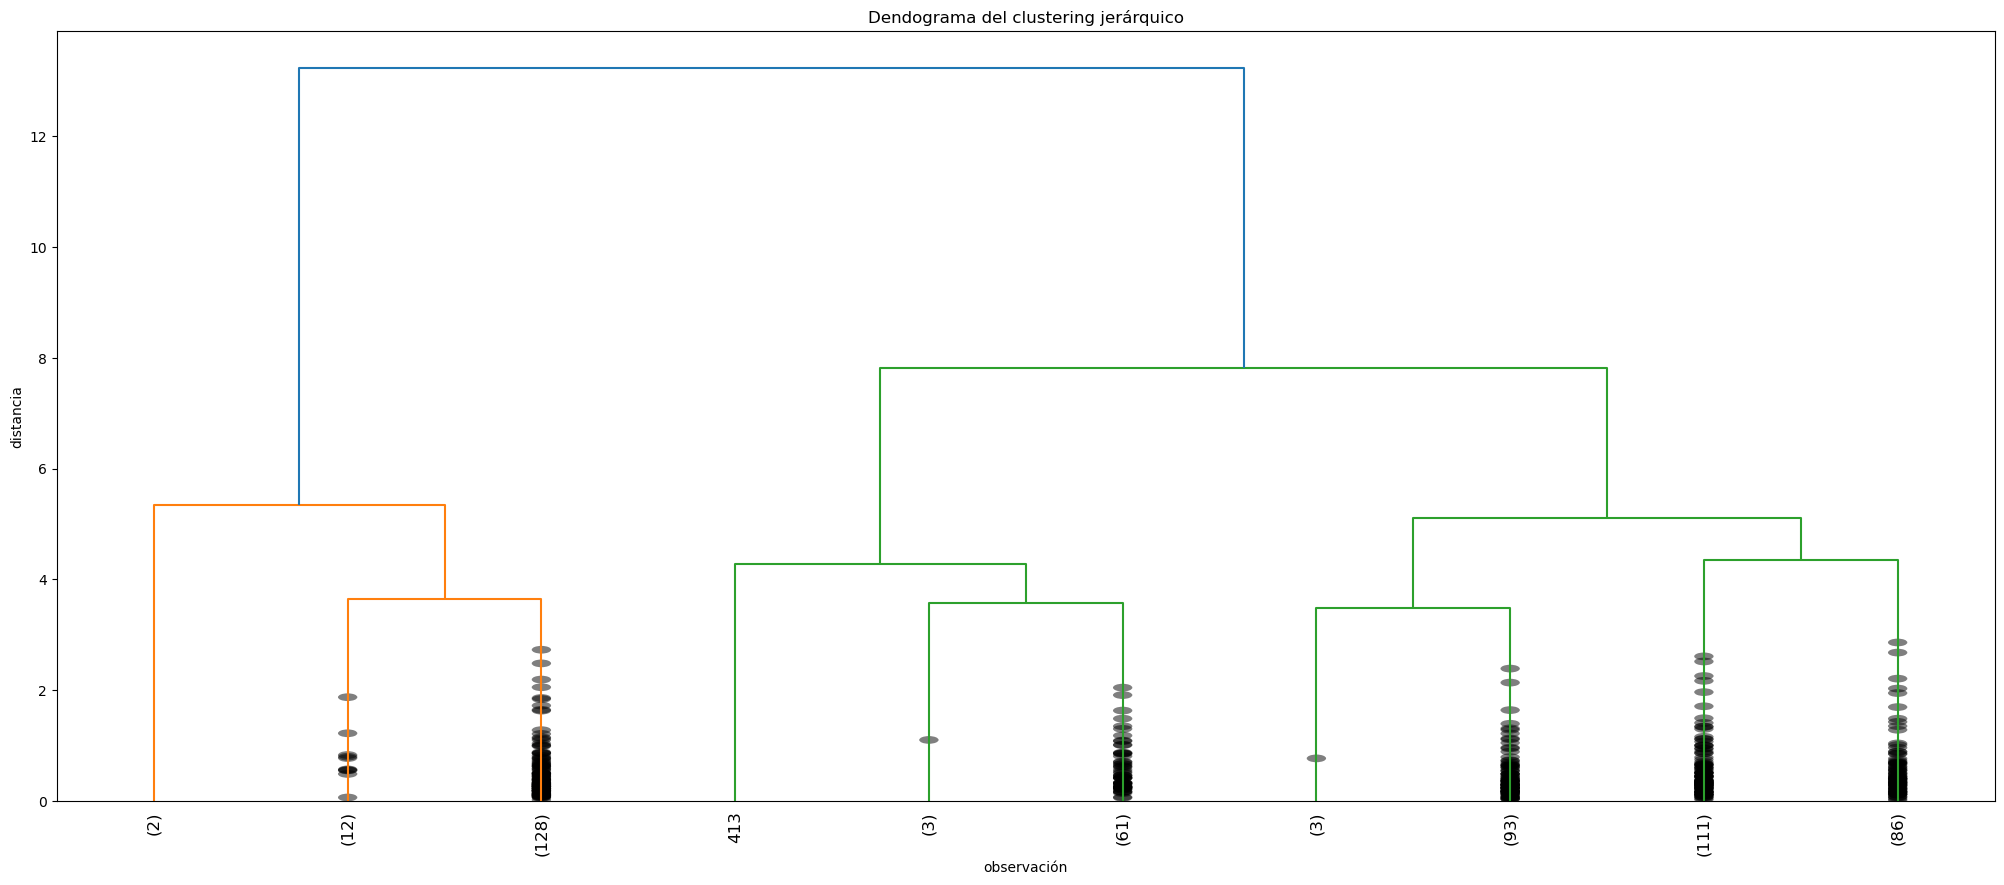

In [51]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico")
plt.xlabel("observación")
plt.ylabel("distancia")
dendrogram(jerarquia, truncate_mode="lastp",p=10,show_leaf_counts=True,show_contracted=True,leaf_rotation=90,leaf_font_size=12)
plt.show()

Se utiliza la distancia mínima entre clusters para elegir el nivel horizontal (y por tanto, el númerod e clusters). Se observan distintos cortes en distancias 14, 10, 7, 5.3, 5, 4.2 ...

In [54]:
distancia_max=10 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")

In [56]:
set(clusters)

{1, 2}

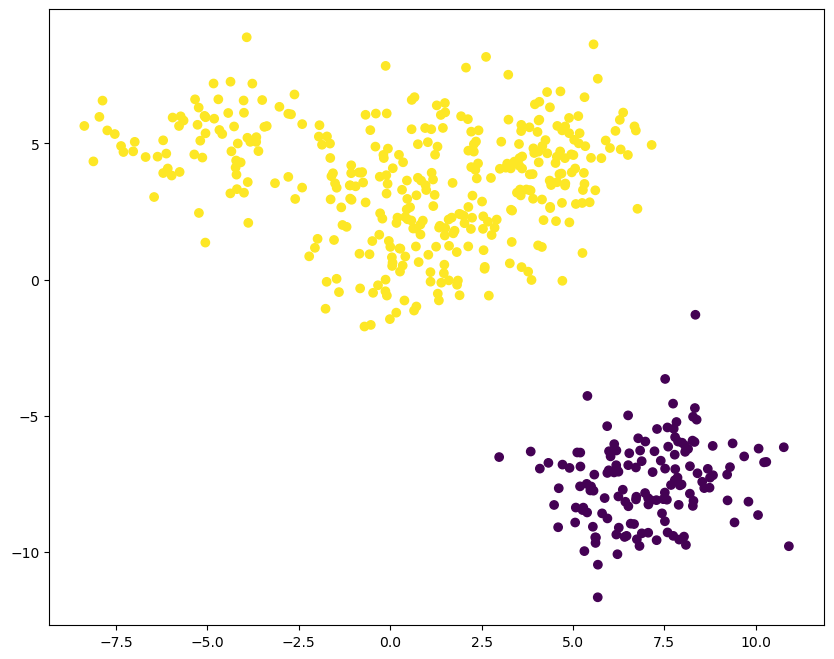

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Se repiten los cortes mencionados para ver los distintos clusters que se generarían.

Un cluster (distancia 14):

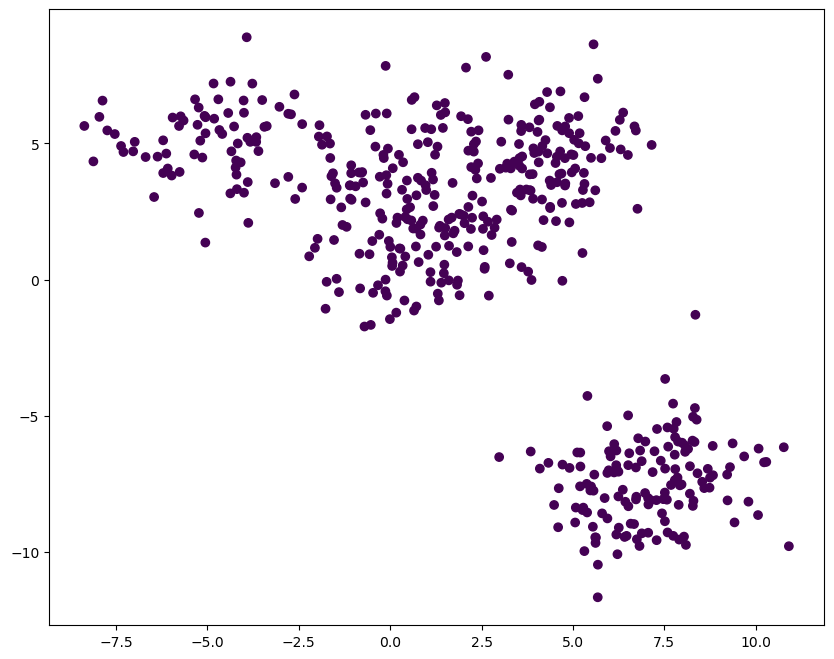

In [63]:
distancia_max=14 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Dos clusters (distancia 10)

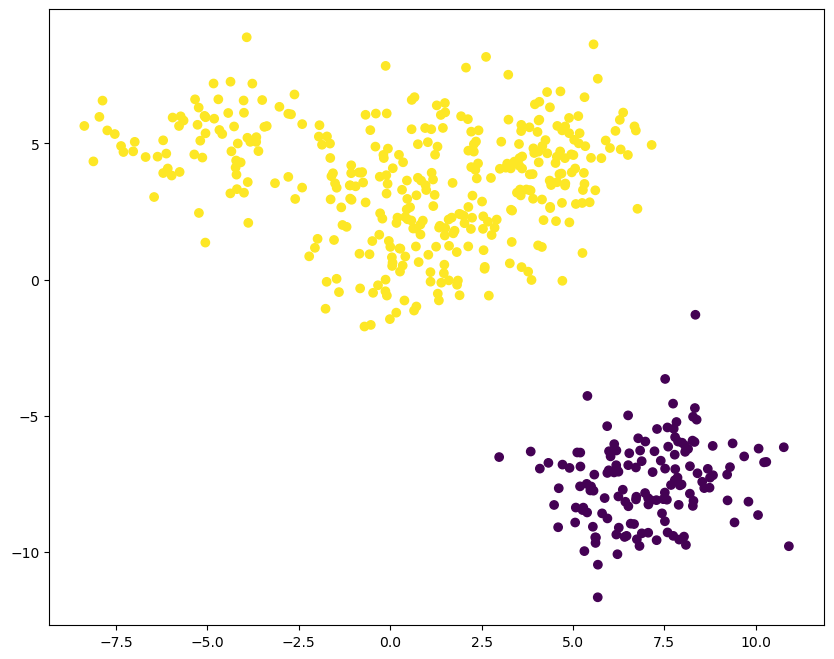

In [66]:
distancia_max=10 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Tres clusters (distancia 7):

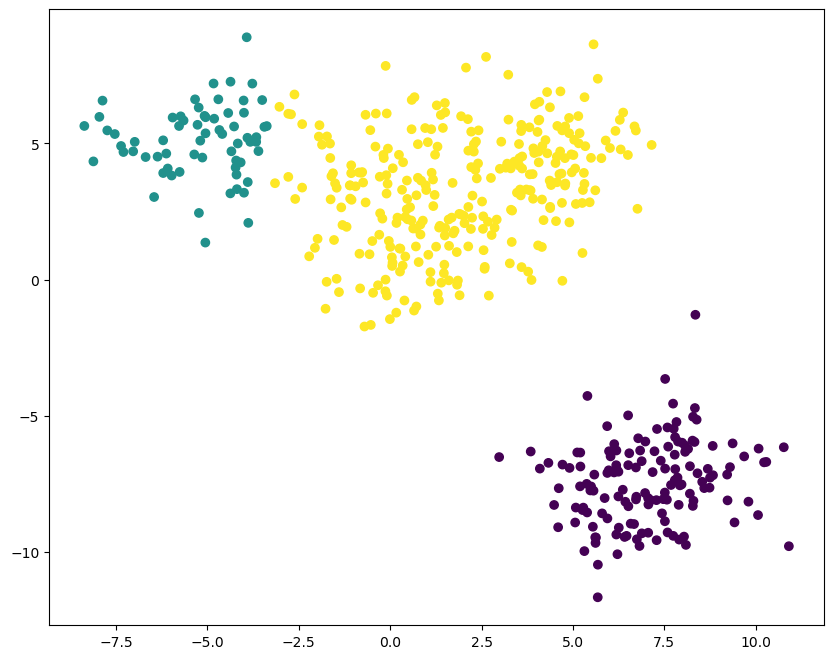

In [69]:
distancia_max= 7
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Cuatro clusters (distancia 5.3)

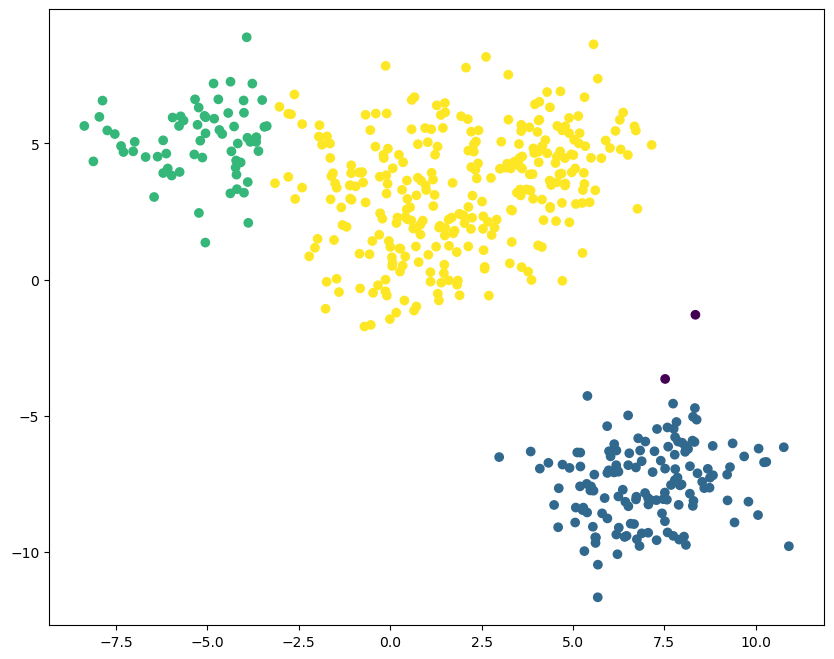

In [72]:
distancia_max= 5.3 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Cinco clusters (distancia 5):

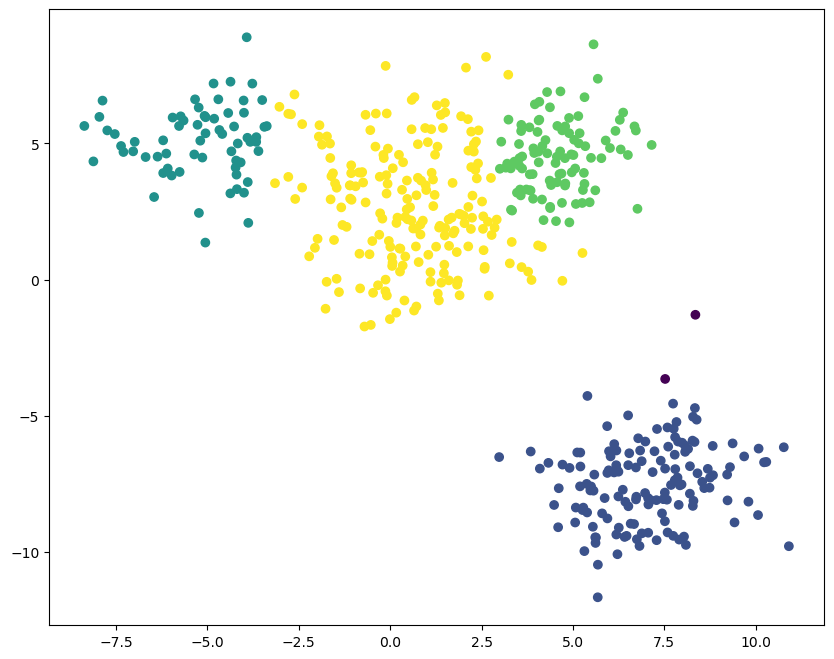

In [76]:
distancia_max=5 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Seis clusters (distancia 4.3)

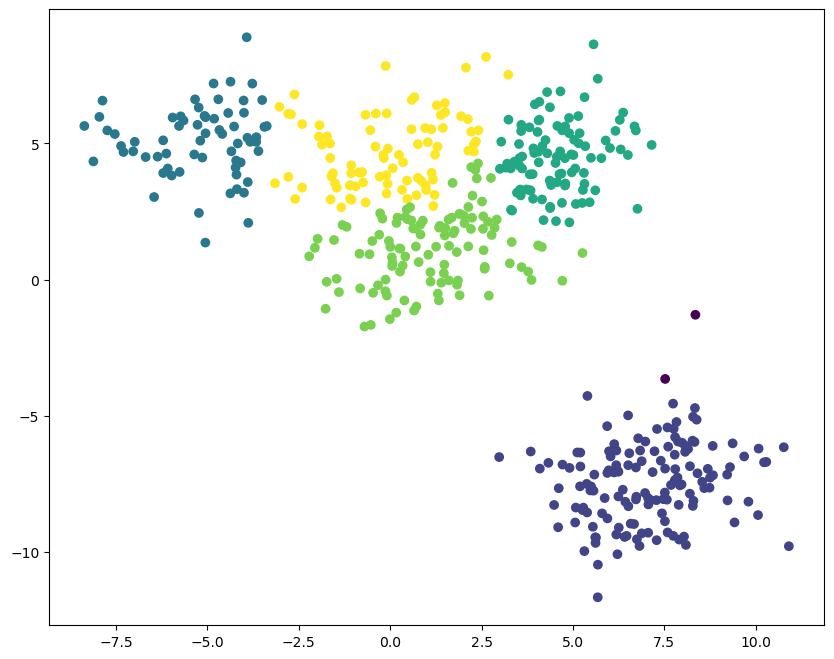

In [79]:
distancia_max=4.3 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

Siete clusters (distancia 4)

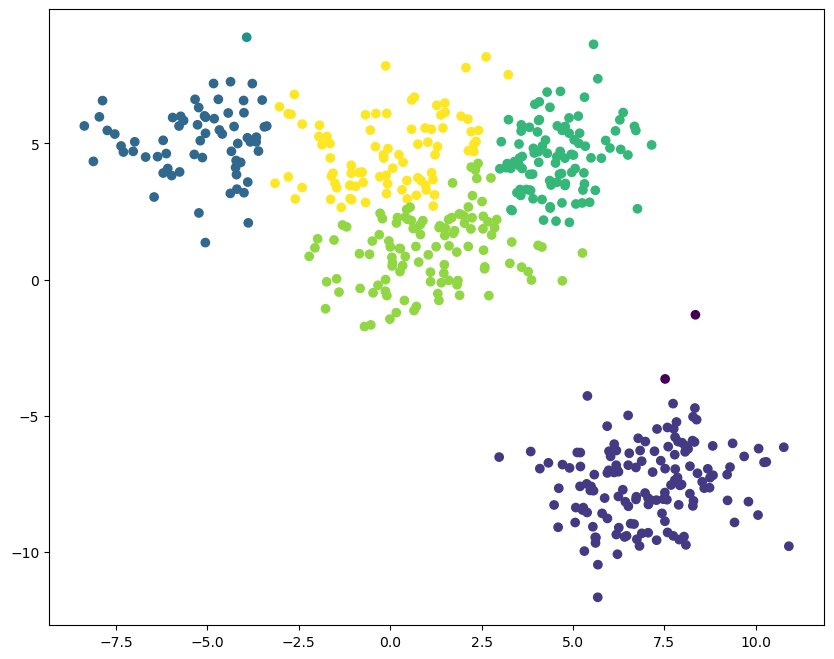

In [82]:
distancia_max=4 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()

32 clusters (distancia 2).

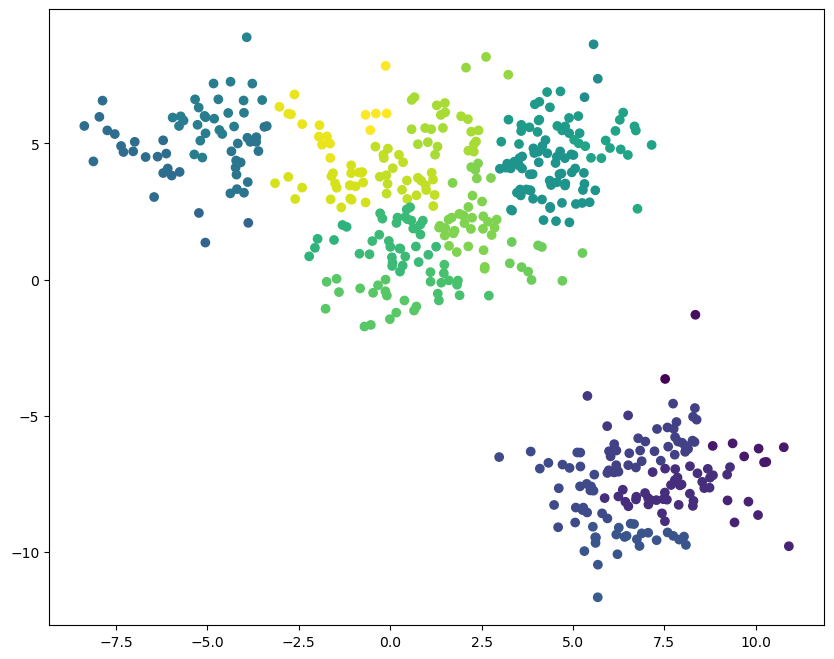

In [85]:
distancia_max=2 
clusters = fcluster(jerarquia, distancia_max, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(datos_simulados[:,0],datos_simulados[:,1],c=clusters)
plt.show()